In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [8]:
# 定义模型
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

# 定义优化器
adam = Adam(lr=1e-4)

# 定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
) 
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
) 

In [10]:
batch_size = 32

# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    'image/train',
    target_size=(150,150),
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    'image/test',
    target_size=(150,150),
    batch_size=batch_size,
    )

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [12]:
model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=50,validation_data=test_generator,validation_steps=len(test_generator))

Epoch 1/50
13/13 [==============================] - 55s 4s/step - loss: 0.6966 - accuracy: 0.4750 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/50
13/13 [==============================] - 53s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 3/50
13/13 [==============================] - 53s 4s/step - loss: 0.6898 - accuracy: 0.5075 - val_loss: 0.6436 - val_accuracy: 0.5050
Epoch 4/50
13/13 [==============================] - 53s 4s/step - loss: 0.6832 - accuracy: 0.5450 - val_loss: 0.6815 - val_accuracy: 0.6000
Epoch 5/50
13/13 [==============================] - 53s 4s/step - loss: 0.6803 - accuracy: 0.5525 - val_loss: 0.7005 - val_accuracy: 0.5950
Epoch 6/50
13/13 [==============================] - 53s 4s/step - loss: 0.6726 - accuracy: 0.5875 - val_loss: 0.6461 - val_accuracy: 0.5950
Epoch 7/50
13/13 [==============================] - 52s 4s/step - loss: 0.6756 - accuracy: 0.5725 - val_loss: 0.6429 - val_accuracy: 0.6200
Epoch 8/50
13/13 [==

In [13]:
# pip install h5py
model.save('model_cnn.h5') # 保存模型

# 测试

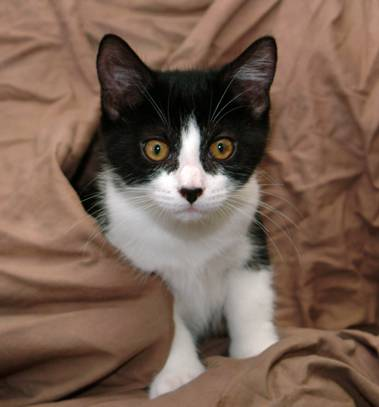

In [14]:
from keras.models import load_model
import numpy as np

label = np.array(['cat','dog'])
# 载入模型
model = load_model('model_cnn.h5')

# 导入图片
image = load_img('image/test/cat/cat.1002.jpg')
image

In [15]:
image = image.resize((150,150))
image = img_to_array(image)
image = image/255
image = np.expand_dims(image,0)
image.shape

(1, 150, 150, 3)

In [16]:
print(label[model.predict_classes(image)])

['cat']
